## Text Embeddings

In [ ]:
import os
import sys
import sklearn
sys.path.append('./')
print(sys.path)
import pyximport
pyximport.install()

!pip3 install fastembed==0.3.1

# This will automatically compile the .pyx file when imported
import cython_optimizations
# Clean previous builds
!rm -f cython_optimizations*.so cython_optimizations*.c

# Recompile with current Python version
!python setup.py build_ext --inplace




In [ ]:
!pip3 install --no-deps --no-cache -r requirements.txt

In [4]:
!python --version 

Python 3.11.11


In [5]:
from sklearn.cluster import spectral_clustering
from pathlib import Path
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

import utils
from utils import evaluate_submission_file, generate_submission_file, load_text_file 
from utils import get_log_paths, get_log_fnames, repo_path
from utils import scan_logs_for_uvm_error_and_failure,process_logs_batch, multithreaded_scan_logs, copy_failing_logs, load_text_file, segment_text, word_frequency, plot_word_frequency, find_lines_with_keywords, search_ordered_keywords_in_line, regex_search, keyword_frequency, plot_keyword_frequency, count_uvm_error, count_string_occurence, contains_failure, compute_cosine_similarity, compute_affinity, update_affinity_matrix, compute_affinity_matrix_multithreaded, remove_warning_and_empty_lines, process_log_files, clean_all_logs

from shutil import copy2
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
from pathlib import Path
from collections import Counter
from math import ceil
from shutil import copy2
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
from pathlib import Path

import re
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import json
import multiprocessing
import os
import cython_optimizations
import time

#sys.path.append('/proj/bh30/asharm15/ml_solution/mlchallenge_submissions')
sys.path.append('./')
print(sys.path)



['/kaggle/working', '/kaggle/lib/kagglegym', '/kaggle/lib', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/usr/local/lib/python3.11/dist-packages/setuptools/_vendor', '/root/.ipython', '/tmp/tmpg4h8jslb', './', './']


In [6]:
import cython_optimizations

In [10]:

num_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores: {num_cores}")


Number of CPU cores: 4


In [11]:
max_workers= 4

Current working directory: /kaggle/working
✓ Successfully imported utils and cython_optimizations
Starting log processing pipeline...
=== STEP 1: Check input log directory ===
Checking log directory: /kaggle/input/abcdef
✓ Directory /kaggle/input/abcdef exists!
Found 85 total files, 78 log/txt files
Sample log files:
  1. 10 Market Predictions IMPORTANT for 2025 Akshat Shrivastava Lz4osGLMLmg_complete_transcription_fixed_part1.txt (42,007 bytes)
  2. The most powerful way to think about money Paula Pant ugIuHWc6Nuc_complete_transcription_fixed_part1.txt (9,401 bytes)
  3. Formal VerificationI LitGyilPOc_complete_transcription_fixed_part1.txt (30,290 bytes)
  4. RISCV Summit 2019 31 Democratising Formal Verification of RISC V Processors hNmIefGSdqs_complete_transcription_fixed_part1.txt (35,269 bytes)
  5. Formal verification by the book ISA Formal at ARM Z7qkYOpu7I_complete_transcription_fixed_part1.txt (39,544 bytes)
=== STEP 2: Convert .txt files to .log files ===
Converting 78 .txt 

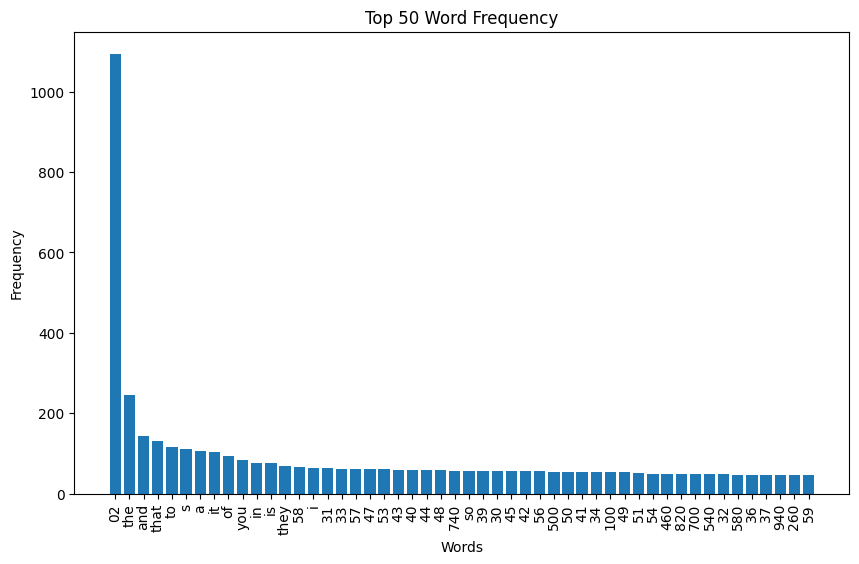

=== STEP 4: Scan logs for failures ===


Scanning Logs: 100%|██████████| 78/78 [00:00<00:00, 331.85file/s]
Copying Failing Logs: 0file [00:00, ?file/s]


Found 0 failing logs.
All failing logs have been copied to: /kaggle/working/data/log_files_failing
=== STEP 5: Clean all logs ===


Cleaning Logs: 100%|██████████| 78/78 [00:00<00:00, 613.85file/s]


Completed processing 78 log files.
✓ Execution Time: 0.1303 seconds
✓ Cleaned logs have been stored at /kaggle/working/data/log_data
=== STEP 6: Embed logs using Cython optimizations ===
=== Multi-GPU Log Embedding Pipeline ===
Detected 2 GPU(s)
GPU 0: Tesla T4 (14.7 GB)
GPU 1: Tesla T4 (14.7 GB)
GPU Configuration: {'device_count': 2, 'batch_size_per_gpu': 128, 'max_sequence_length': 512, 'providers': ['CUDAExecutionProvider'], 'device_ids': [0, 1]}
Initializing model on GPU 0


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/673 [00:00<?, ?B/s]

model_optimized.onnx:   0%|          | 0.00/235M [00:00<?, ?B/s]

✗ Error during processing: Provider CUDAExecutionProvider is not available. Available providers: ['AzureExecutionProvider', 'CPUExecutionProvider']
Pipeline completed!


Traceback (most recent call last):
  File "/tmp/ipykernel_35/653338929.py", line 218, in main
    log_chunk_info = cython_optimizations.embed_logs(
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "cython_optimizations.pyx", line 262, in cython_optimizations.embed_logs
    models = initialize_multi_gpu_models(embedding_model_name, gpu_config)
  File "cython_optimizations.pyx", line 61, in cython_optimizations.initialize_multi_gpu_models
    model = TextEmbedding(
  File "/usr/local/lib/python3.11/dist-packages/fastembed/text/text_embedding.py", line 68, in __init__
    self.model = EMBEDDING_MODEL_TYPE(
                 ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/fastembed/text/onnx_embedding.py", line 227, in __init__
    self.load_onnx_model(
  File "/usr/local/lib/python3.11/dist-packages/fastembed/text/onnx_text_model.py", line 46, in load_onnx_model
    super().load_onnx_model(
  File "/usr/local/lib/python3.11/dist-packages/fastembed/common/o

In [7]:
import os
import sys
import multiprocessing
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import json
from sklearn.cluster import spectral_clustering
from pathlib import Path
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
from shutil import copy2
from collections import Counter
from math import ceil
import re

# Add current directory to path for local imports
sys.path.append('./')
print("Current working directory:", os.getcwd())

# Import local modules
try:
    import utils
    import cython_optimizations
    print("✓ Successfully imported utils and cython_optimizations")
except ImportError as e:
    print(f"✗ Import error: {e}")
    print("Please ensure utils.py and compiled cython_optimizations are in the current directory")
    sys.exit(1)

def check_and_list_log_directory(log_dir):
    """Check if log directory exists and list available files."""
    print(f"Checking log directory: {log_dir}")
    
    if not os.path.exists(log_dir):
        print(f"✗ Directory {log_dir} does not exist!")
        
        # Check if parent directory exists
        parent_dir = os.path.dirname(log_dir)
        if os.path.exists(parent_dir):
            print(f"Parent directory {parent_dir} exists. Available subdirectories:")
            try:
                subdirs = [d for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]
                for subdir in subdirs[:10]:  # Show first 10
                    print(f"  - {subdir}")
            except Exception as e:
                print(f"Error listing parent directory: {e}")
        
        # Check /kaggle/input for available datasets
        kaggle_input = "/kaggle/input"
        if os.path.exists(kaggle_input):
            print(f"\nAvailable datasets in {kaggle_input}:")
            try:
                datasets = [d for d in os.listdir(kaggle_input) if os.path.isdir(os.path.join(kaggle_input, d))]
                for dataset in datasets:
                    print(f"  - {dataset}")
            except Exception as e:
                print(f"Error listing Kaggle input directory: {e}")
        
        return False, []
    
    print(f"✓ Directory {log_dir} exists!")
    
    try:
        all_files = os.listdir(log_dir)
        log_files = [f for f in all_files if f.endswith(('.log', '.txt'))]
        print(f"Found {len(all_files)} total files, {len(log_files)} log/txt files")
        
        if log_files:
            print("Sample log files:")
            for i, filename in enumerate(log_files[:5]):
                file_path = os.path.join(log_dir, filename)
                try:
                    file_size = os.path.getsize(file_path)
                    print(f"  {i+1}. {filename} ({file_size:,} bytes)")
                except Exception as e:
                    print(f"  {i+1}. {filename} (size unknown: {e})")
        
        return True, log_files
    
    except Exception as e:
        print(f"✗ Error accessing directory: {e}")
        return False, []

def convert_txt_to_log(directory):
    """Convert all .txt files in the given directory to .log files."""
    converted_files = []
    
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return converted_files
    
    txt_files = [f for f in os.listdir(directory) if f.endswith('.txt')]
    
    if not txt_files:
        print(f"No .txt files found in {directory}")
        return converted_files
        
    print(f"Converting {len(txt_files)} .txt files to .log files...")
    
    # Create output directory for converted files
    output_dir = os.path.join(os.getcwd(), 'data', 'converted_logs')
    os.makedirs(output_dir, exist_ok=True)
    
    for filename in txt_files:
        txt_path = os.path.join(directory, filename)
        log_filename = filename.rsplit('.', 1)[0] + '.log'
        log_path = os.path.join(output_dir, log_filename)
        
        try:
            with open(txt_path, 'r', encoding='utf-8', errors='ignore') as f_in:
                content = f_in.read()
            with open(log_path, 'w', encoding='utf-8') as f_out:
                f_out.write(content)
            converted_files.append(log_path)
        except Exception as e:
            print(f"Error converting {filename}: {e}")
    
    print(f"✓ Successfully converted {len(converted_files)} files to {output_dir}")
    return converted_files, output_dir

def main():
    """Main processing pipeline"""
    
    # Updated path for Kaggle input
    input_log_dir = '/kaggle/input/abcdef'
    
    # Define output paths
    working_dir = os.getcwd()
    converted_log_dir = os.path.join(working_dir, 'data', 'converted_logs')
    processed_log_dir = os.path.join(working_dir, 'data', 'log_data')
    embedding_output_dir = os.path.join(working_dir, 'data', 'log_embeddings_temp')
    
    # Create output directories
    for directory in [converted_log_dir, processed_log_dir, embedding_output_dir]:
        os.makedirs(directory, exist_ok=True)
    
    print("=== STEP 1: Check input log directory ===")
    dir_exists, available_files = check_and_list_log_directory(input_log_dir)
    
    if not dir_exists:
        print("❌ Cannot proceed without access to log files.")
        print("Please check:")
        print("1. Dataset name is correct in Kaggle")
        print("2. Dataset is properly attached to your notebook")
        print("3. Directory path is accurate")
        return
    
    if not available_files:
        print("❌ No log or txt files found in the directory.")
        return
    
    # Determine the working directory for logs
    log_files = [f for f in available_files if f.endswith('.log')]
    txt_files = [f for f in available_files if f.endswith('.txt')]
    
    if txt_files and not log_files:
        print("=== STEP 2: Convert .txt files to .log files ===")
        converted_files, working_log_dir = convert_txt_to_log(input_log_dir)
        if not converted_files:
            print("❌ Failed to convert any files.")
            return
    elif log_files:
        print("=== STEP 2: Using existing .log files ===")
        working_log_dir = input_log_dir
    else:
        print("❌ No suitable log files found.")
        return
    
    print("=== STEP 3: Process logs ===")
    # Get CPU info
    num_cores = multiprocessing.cpu_count()
    max_workers = min(30, num_cores)
    print(f"Number of CPU cores: {num_cores}")
    print(f"Using max_workers: {max_workers}")
    
    try:
        # Find a sample log file to analyze
        available_logs = [f for f in os.listdir(working_log_dir) if f.endswith('.log')]
        if not available_logs:
            print("❌ No .log files found for processing.")
            return
            
        sample_file_name = available_logs[0]
        sample_file_path = os.path.join(working_log_dir, sample_file_name)
        print(f"Using sample file: {sample_file_name}")
        
        # Analyze word frequency in sample log
        print(f"Analyzing word frequency in: {sample_file_name}")
        text = utils.load_text_file(sample_file_path)
        words = utils.segment_text(text)
        word_count = utils.word_frequency(words)
        utils.plot_word_frequency(word_count, top_n=50)
        
        print("=== STEP 4: Scan logs for failures ===")
        # Scan logs using multithreaded approach
        log_file_counts = utils.multithreaded_scan_logs(working_log_dir, max_workers=max_workers)
        
        # Copy failing logs to a new directory
        fail_count, failing_logs_dir = utils.copy_failing_logs(log_file_counts, working_log_dir)
        print(f"Found {fail_count} failing logs.")
        print(f"All failing logs have been copied to: {failing_logs_dir}")
        
        print("=== STEP 5: Clean all logs ===")
        # Clean logs
        start_time = time.time()
        utils.clean_all_logs(working_log_dir, processed_log_dir, max_workers=max_workers)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"✓ Execution Time: {execution_time:.4f} seconds")
        print(f"✓ Cleaned logs have been stored at {processed_log_dir}")
        
        print("=== STEP 6: Embed logs using Cython optimizations ===")
        # Call the Cython module to process and embed the logs
        # In your main function, replace the old call with:
        log_chunk_info = cython_optimizations.embed_logs(
            log_directory=processed_log_dir,
            output_directory=embedding_output_dir,
            embedding_model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
            worst_case_chunks=1000,
            overlap_percentage=0.4,
            max_workers=2  # For 2 T4 GPUs
        )

        
        print("✓ Embedding completed successfully!")
        print(f"✓ Embeddings saved to: {embedding_output_dir}")
        
    except Exception as e:
        print(f"✗ Error during processing: {e}")
        import traceback
        traceback.print_exc()

# Execute the main pipeline
if __name__ == '__main__':
    print("Starting log processing pipeline...")
    main()
    print("Pipeline completed!")


##################  EMBEDDING_MODELS = {
    "production": {
        "name": "BAAI/bge-small-en-v1.5",  # Recommended in search results [3]
        "dimension": 384,
        "description": "Best balance of speed and quality"
    },
    "balanced": {
        "name": "all-mpnet-base-v2", 
        "dimension": 768,
        "description": "Good quality, moderate size"
    },
    "multilingual": {
        "name": "sentence-transformers/paraphrase-multilingual-mpnet-base-dot-v1",
        "dimension": 768,
        "description": "Multi-language support"
    }
} ###########################

In [19]:
import os
import torch
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import psutil

# Fix tokenizers warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"

class MultiGPUEmbedder:
    def __init__(self, model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"):
        self.model_name = model_name
        self.gpu_config = self._setup_gpu_config()
        self.models = self._initialize_models()
    
    def _setup_gpu_config(self):
        """Setup optimal configuration for T4 GPUs"""
        config = {
            'device_count': 0,
            'batch_size_per_gpu': 32,
            'max_length': 512,
            'device_ids': []
        }
        
        if torch.cuda.is_available():
            gpu_count = torch.cuda.device_count()
            print(f"🚀 Detected {gpu_count} GPU(s)")
            
            for i in range(gpu_count):
                gpu_name = torch.cuda.get_device_name(i)
                gpu_memory = torch.cuda.get_device_properties(i).total_memory / (1024**3)
                print(f"  GPU {i}: {gpu_name} ({gpu_memory:.1f} GB)")
            
            # T4 optimal settings
            config.update({
                'device_count': min(gpu_count, 2),
                'batch_size_per_gpu': 128,  # Optimal for T4
                'device_ids': list(range(min(gpu_count, 2)))
            })
        else:
            print("❌ No GPUs detected, using CPU")
        
        return config
    
    def _initialize_models(self):
        """Initialize one model per GPU"""
        models = []
        
        if self.gpu_config['device_count'] > 0:
            for gpu_id in self.gpu_config['device_ids']:
                print(f"🔧 Loading model on GPU {gpu_id}")
                model = SentenceTransformer(self.model_name, device=f'cuda:{gpu_id}')
                models.append((model, gpu_id))
        else:
            print("🔧 Loading model on CPU")
            model = SentenceTransformer(self.model_name, device='cpu')
            models.append((model, -1))
        
        return models
    
    def read_text_file(self, file_path, chunk_size=1000):
        """Read text file and split into chunks"""
        try:
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                lines = [line.strip() for line in f if line.strip()]
            
            if not lines:
                return []
            
            # Create chunks of text
            chunks = []
            for i in range(0, len(lines), chunk_size):
                chunk_text = '\n'.join(lines[i:i + chunk_size])
                if chunk_text:
                    chunks.append(chunk_text)
            
            return chunks
        
        except Exception as e:
            print(f"❌ Error reading {file_path}: {e}")
            return []
    
    def embed_batch_on_gpu(self, texts, model, gpu_id, batch_size):
        """Process a batch of texts on specific GPU"""
        if gpu_id >= 0:
            torch.cuda.set_device(gpu_id)
        
        embeddings = []
        
        try:
            # Process in smaller batches to avoid memory issues
            for i in range(0, len(texts), batch_size):
                batch = texts[i:i + batch_size]
                
                batch_embeddings = model.encode(
                    batch,
                    batch_size=batch_size,
                    convert_to_tensor=True,
                    normalize_embeddings=True,
                    show_progress_bar=False
                )
                
                # Convert to CPU numpy array
                embeddings.append(batch_embeddings.cpu().numpy())
                
                # Clear GPU cache periodically
                if gpu_id >= 0 and i % (batch_size * 4) == 0:
                    torch.cuda.empty_cache()
        
        except Exception as e:
            print(f"❌ Error on GPU {gpu_id}: {e}")
            # Fallback to smaller batch size
            batch_size = max(1, batch_size // 2)
            return self.embed_batch_on_gpu(texts, model, gpu_id, batch_size)
        
        if embeddings:
            return np.vstack(embeddings)
        else:
            return np.array([])
    
    def embed_texts_multi_gpu(self, texts):
        """Distribute texts across multiple GPUs"""
        if not texts:
            return np.array([])
        
        num_gpus = len(self.models)
        batch_size = self.gpu_config['batch_size_per_gpu']
        
        if num_gpus == 1:
            model, gpu_id = self.models[0]
            return self.embed_batch_on_gpu(texts, model, gpu_id, batch_size)
        
        # Distribute texts across GPUs
        texts_per_gpu = len(texts) // num_gpus
        text_batches = []
        
        for i in range(num_gpus):
            start_idx = i * texts_per_gpu
            if i == num_gpus - 1:  # Last GPU gets remaining texts
                end_idx = len(texts)
            else:
                end_idx = (i + 1) * texts_per_gpu
            text_batches.append(texts[start_idx:end_idx])
        
        # Process on multiple GPUs in parallel
        all_embeddings = []
        
        with ThreadPoolExecutor(max_workers=num_gpus) as executor:
            futures = []
            
            for i, (model, gpu_id) in enumerate(self.models):
                if i < len(text_batches) and text_batches[i]:
                    future = executor.submit(
                        self.embed_batch_on_gpu,
                        text_batches[i],
                        model,
                        gpu_id,
                        batch_size
                    )
                    futures.append((future, i))
            
            # Collect results in order
            results = [None] * len(futures)
            for future, gpu_idx in futures:
                try:
                    result = future.result()
                    results[gpu_idx] = result
                except Exception as e:
                    print(f"❌ GPU {gpu_idx} failed: {e}")
                    results[gpu_idx] = np.array([])
        
        # Concatenate results
        valid_results = [r for r in results if r is not None and len(r) > 0]
        if valid_results:
            return np.vstack(valid_results)
        else:
            return np.array([])
    
    def process_file(self, input_file, output_dir, chunk_size=1000):
        """Process a single text file"""
        print(f"📄 Processing: {Path(input_file).name}")
        
        # Read and chunk text
        chunks = self.read_text_file(input_file, chunk_size)
        if not chunks:
            print(f"⚠️ No content found in {input_file}")
            return
        
        print(f"  📊 Created {len(chunks)} chunks")
        
        # Generate embeddings
        start_time = time.time()
        embeddings = self.embed_texts_multi_gpu(chunks)
        processing_time = time.time() - start_time
        
        if len(embeddings) > 0:
            # Save embeddings
            output_file = Path(output_dir) / f"{Path(input_file).stem}_embeddings.npy"
            np.save(output_file, embeddings)
            
            print(f"  ✅ Saved {embeddings.shape} embeddings to {output_file.name}")
            print(f"  ⏱️ Processing time: {processing_time:.2f}s")
            print(f"  🚄 Speed: {len(chunks)/processing_time:.1f} chunks/sec")
        else:
            print(f"  ❌ Failed to generate embeddings for {input_file}")
    
    def process_directory(self, input_dir, output_dir, chunk_size=1000):
        """Process all text files in a directory"""
        input_path = Path(input_dir)
        output_path = Path(output_dir)
        output_path.mkdir(parents=True, exist_ok=True)
        
        # Find all text files
        text_files = []
        for ext in ['*.txt', '*.log']:
            text_files.extend(input_path.glob(ext))
        
        if not text_files:
            print(f"❌ No text files found in {input_dir}")
            return
        
        print(f"🎯 Found {len(text_files)} files to process")
        print(f"💾 Output directory: {output_dir}")
        print(f"🔧 Chunk size: {chunk_size} lines per chunk")
        print(f"🚀 Using {self.gpu_config['device_count']} GPU(s)")
        print("-" * 60)
        
        # Process files
        total_start_time = time.time()
        
        for file_path in tqdm(text_files, desc="Processing files"):
            try:
                self.process_file(file_path, output_dir, chunk_size)
                
                # Clean GPU memory between files
                if self.gpu_config['device_count'] > 0:
                    for gpu_id in self.gpu_config['device_ids']:
                        torch.cuda.set_device(gpu_id)
                        torch.cuda.empty_cache()
                
            except Exception as e:
                print(f"❌ Error processing {file_path}: {e}")
        
        total_time = time.time() - total_start_time
        print("-" * 60)
        print(f"🎉 Completed! Total time: {total_time:.2f}s")
        print(f"📊 Average time per file: {total_time/len(text_files):.2f}s")

def main():
    """Main function"""
    # Configuration
    INPUT_DIR = "/kaggle/input/abcdef"  # Change this to your input directory
    OUTPUT_DIR = "/kaggle/working/embeddings"
    CHUNK_SIZE = 1  # Lines per chunk
    MODEL_NAME = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
    
    print("🚀 Multi-GPU Text Embedding Pipeline")
    print("=" * 60)
    
    # Initialize embedder
    embedder = MultiGPUEmbedder(model_name=MODEL_NAME)
    
    # Process files
    embedder.process_directory(INPUT_DIR, OUTPUT_DIR, CHUNK_SIZE)
    
    print("✅ All done!")

if __name__ == "__main__":
    main()


🚀 Multi-GPU Text Embedding Pipeline
🚀 Detected 2 GPU(s)
  GPU 0: Tesla T4 (14.7 GB)
  GPU 1: Tesla T4 (14.7 GB)
🔧 Loading model on GPU 0
🔧 Loading model on GPU 1
🎯 Found 78 files to process
💾 Output directory: /kaggle/working/embeddings
🔧 Chunk size: 1 lines per chunk
🚀 Using 2 GPU(s)
------------------------------------------------------------


Processing files:   0%|          | 0/78 [00:00<?, ?it/s]

📄 Processing: 10 Market Predictions IMPORTANT for 2025 Akshat Shrivastava Lz4osGLMLmg_complete_transcription_fixed_part1.txt
  📊 Created 1527 chunks


Processing files:   1%|▏         | 1/78 [00:00<00:37,  2.03it/s]

  ✅ Saved (1527, 384) embeddings to 10 Market Predictions IMPORTANT for 2025 Akshat Shrivastava Lz4osGLMLmg_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.49s
  🚄 Speed: 3146.4 chunks/sec
📄 Processing: The most powerful way to think about money Paula Pant ugIuHWc6Nuc_complete_transcription_fixed_part1.txt
  📊 Created 309 chunks
  ✅ Saved (309, 384) embeddings to The most powerful way to think about money Paula Pant ugIuHWc6Nuc_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.09s
  🚄 Speed: 3262.0 chunks/sec
📄 Processing: Formal VerificationI LitGyilPOc_complete_transcription_fixed_part1.txt
  📊 Created 717 chunks


Processing files:   4%|▍         | 3/78 [00:00<00:18,  4.08it/s]

  ✅ Saved (717, 384) embeddings to Formal VerificationI LitGyilPOc_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.21s
  🚄 Speed: 3424.5 chunks/sec
📄 Processing: RISCV Summit 2019 31 Democratising Formal Verification of RISC V Processors hNmIefGSdqs_complete_transcription_fixed_part1.txt
  📊 Created 1050 chunks


Processing files:   5%|▌         | 4/78 [00:01<00:19,  3.71it/s]

  ✅ Saved (1050, 384) embeddings to RISCV Summit 2019 31 Democratising Formal Verification of RISC V Processors hNmIefGSdqs_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.31s
  🚄 Speed: 3375.4 chunks/sec
📄 Processing: Formal verification by the book ISA Formal at ARM Z7qkYOpu7I_complete_transcription_fixed_part1.txt
  📊 Created 930 chunks


Processing files:   8%|▊         | 6/78 [00:01<00:17,  4.07it/s]

  ✅ Saved (930, 384) embeddings to Formal verification by the book ISA Formal at ARM Z7qkYOpu7I_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.33s
  🚄 Speed: 2860.3 chunks/sec
📄 Processing: How I Spot Winning Trades Using Chart Patterns My AI Tool for Stock Trading Vivek Bajaj PxxTDhvBzN0_complete_transcription_fixed_part1.txt
  📊 Created 405 chunks
  ✅ Saved (405, 384) embeddings to How I Spot Winning Trades Using Chart Patterns My AI Tool for Stock Trading Vivek Bajaj PxxTDhvBzN0_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.14s
  🚄 Speed: 2910.1 chunks/sec
📄 Processing: Is Indias Economy Struggling or Winning Data Backed Analysis 8jlrX0EeEXk1_complete_transcription_fixed_part1.txt
  📊 Created 834 chunks


Processing files:  10%|█         | 8/78 [00:01<00:14,  4.73it/s]

  ✅ Saved (834, 384) embeddings to Is Indias Economy Struggling or Winning Data Backed Analysis 8jlrX0EeEXk1_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.24s
  🚄 Speed: 3506.9 chunks/sec
📄 Processing: Shri Ratan Tatas Unreleased Talk On Elon Musk 2611 JRD Tata INSIGHT The DNA of Success 2014 N3qCSmUXxlM1_complete_transcription_fixed_part2.txt
  📊 Created 357 chunks
  ✅ Saved (357, 384) embeddings to Shri Ratan Tatas Unreleased Talk On Elon Musk 2611 JRD Tata INSIGHT The DNA of Success 2014 N3qCSmUXxlM1_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.12s
  🚄 Speed: 2898.8 chunks/sec
📄 Processing: The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part2.txt
  📊 Created 1986 chunks


Processing files:  12%|█▏        | 9/78 [00:02<00:20,  3.30it/s]

  ✅ Saved (1986, 384) embeddings to The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.50s
  🚄 Speed: 3971.2 chunks/sec
📄 Processing: Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part4.txt
  📊 Created 2037 chunks


Processing files:  13%|█▎        | 10/78 [00:02<00:22,  2.97it/s]

  ✅ Saved (2037, 384) embeddings to Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part4_embeddings.npy
  ⏱️ Processing time: 0.40s
  🚄 Speed: 5084.2 chunks/sec
📄 Processing: Indias Next Big Sector 2X Growth Expected Best STOCKS to Buy Sector FR16UYT4UMM_complete_transcription_fixed_part1.txt
  📊 Created 792 chunks


Processing files:  14%|█▍        | 11/78 [00:03<00:21,  3.14it/s]

  ✅ Saved (792, 384) embeddings to Indias Next Big Sector 2X Growth Expected Best STOCKS to Buy Sector FR16UYT4UMM_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.27s
  🚄 Speed: 2973.8 chunks/sec
📄 Processing: How to find Winning Stocks using Screener Complete Guide on Valuations Ratios Watchlist H7QeuYsQ6Q_complete_transcription_fixed_part2.txt
  📊 Created 1896 chunks


Processing files:  15%|█▌        | 12/78 [00:03<00:23,  2.76it/s]

  ✅ Saved (1896, 384) embeddings to How to find Winning Stocks using Screener Complete Guide on Valuations Ratios Watchlist H7QeuYsQ6Q_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.45s
  🚄 Speed: 4211.1 chunks/sec
📄 Processing: How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part1.txt
  📊 Created 2133 chunks


Processing files:  17%|█▋        | 13/78 [00:04<00:25,  2.50it/s]

  ✅ Saved (2133, 384) embeddings to How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.48s
  🚄 Speed: 4461.3 chunks/sec
📄 Processing: Finding Bugs With Formal Verification Handson Workshop Yura Sherman ppCixBYsO1s_complete_transcription_fixed_part3.txt
  📊 Created 1413 chunks


Processing files:  19%|█▉        | 15/78 [00:04<00:18,  3.43it/s]

  ✅ Saved (1413, 384) embeddings to Finding Bugs With Formal Verification Handson Workshop Yura Sherman ppCixBYsO1s_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.30s
  🚄 Speed: 4666.1 chunks/sec
📄 Processing: The Art of War The greatest strategy book ever written Roger Martin gtmTYznG3o_complete_transcription_fixed_part1.txt
  📊 Created 339 chunks
  ✅ Saved (339, 384) embeddings to The Art of War The greatest strategy book ever written Roger Martin gtmTYznG3o_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.10s
  🚄 Speed: 3397.5 chunks/sec
📄 Processing: Finding Bugs With Formal Verification Handson Workshop Yura Sherman ppCixBYsO1s_complete_transcription_fixed_part2.txt
  📊 Created 1356 chunks


Processing files:  22%|██▏       | 17/78 [00:04<00:15,  4.05it/s]

  ✅ Saved (1356, 384) embeddings to Finding Bugs With Formal Verification Handson Workshop Yura Sherman ppCixBYsO1s_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.30s
  🚄 Speed: 4478.8 chunks/sec
📄 Processing: The single biggest reason why startups succeed Bill Gross TED bNpx7gpSqbY_complete_transcription_fixed_part1.txt
  📊 Created 474 chunks
  ✅ Saved (474, 384) embeddings to The single biggest reason why startups succeed Bill Gross TED bNpx7gpSqbY_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.12s
  🚄 Speed: 3825.2 chunks/sec
📄 Processing: How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part7.txt
  📊 Created 1704 chunks


Processing files:  24%|██▍       | 19/78 [00:05<00:15,  3.79it/s]

  ✅ Saved (1704, 384) embeddings to How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part7_embeddings.npy
  ⏱️ Processing time: 0.46s
  🚄 Speed: 3674.7 chunks/sec
📄 Processing: Starship Update with Elon Musk 2025 y9RvQ20zRE_complete_transcription_fixed_part2.txt
  📊 Created 261 chunks
  ✅ Saved (261, 384) embeddings to Starship Update with Elon Musk 2025 y9RvQ20zRE_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.14s
  🚄 Speed: 1861.1 chunks/sec
📄 Processing: CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part2.txt
  📊 Created 1662 chunks


Processing files:  26%|██▌       | 20/78 [00:06<00:18,  3.09it/s]

  ✅ Saved (1662, 384) embeddings to CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.45s
  🚄 Speed: 3680.5 chunks/sec
📄 Processing: Formal VerificationI LitGyilPOc_complete_transcription_fixed_part3.txt
  📊 Created 174 chunks
  ✅ Saved (174, 384) embeddings to Formal VerificationI LitGyilPOc_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.07s
  🚄 Speed: 2641.3 chunks/sec
📄 Processing: Most Indians will NEVER get rich Shankar Sharma on investing and making BIG Money ecVP2cFbY8_complete_transcription_fixed_part2.txt
  📊 Created 1950 chunks


Processing files:  28%|██▊       | 22/78 [00:06<00:17,  3.17it/s]

  ✅ Saved (1950, 384) embeddings to Most Indians will NEVER get rich Shankar Sharma on investing and making BIG Money ecVP2cFbY8_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.53s
  🚄 Speed: 3681.3 chunks/sec
📄 Processing: An obvious great bet Why Im investing 90 of my money on AI stocks N2GH08vqS3s_complete_transcription_fixed_part1.txt
  📊 Created 1458 chunks


Processing files:  29%|██▉       | 23/78 [00:07<00:18,  2.97it/s]

  ✅ Saved (1458, 384) embeddings to An obvious great bet Why Im investing 90 of my money on AI stocks N2GH08vqS3s_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.39s
  🚄 Speed: 3716.5 chunks/sec
📄 Processing: CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part1.txt
  📊 Created 1509 chunks


Processing files:  31%|███       | 24/78 [00:07<00:19,  2.79it/s]

  ✅ Saved (1509, 384) embeddings to CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.41s
  🚄 Speed: 3707.6 chunks/sec
📄 Processing: Shri Ratan Tatas Unreleased Talk On Elon Musk 2611 JRD Tata INSIGHT The DNA of Success 2014 N3qCSmUXxlM1_complete_transcription_fixed_part1.txt
  📊 Created 651 chunks


Processing files:  32%|███▏      | 25/78 [00:07<00:17,  3.08it/s]

  ✅ Saved (651, 384) embeddings to Shri Ratan Tatas Unreleased Talk On Elon Musk 2611 JRD Tata INSIGHT The DNA of Success 2014 N3qCSmUXxlM1_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.22s
  🚄 Speed: 2899.5 chunks/sec
📄 Processing: Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part4.txt
  📊 Created 2208 chunks


Processing files:  33%|███▎      | 26/78 [00:08<00:19,  2.73it/s]

  ✅ Saved (2208, 384) embeddings to Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part4_embeddings.npy
  ⏱️ Processing time: 0.47s
  🚄 Speed: 4738.3 chunks/sec
📄 Processing: Formal VerificationI LitGyilPOc_complete_transcription_fixed_part2.txt
  📊 Created 663 chunks


Processing files:  35%|███▍      | 27/78 [00:08<00:16,  3.07it/s]

  ✅ Saved (663, 384) embeddings to Formal VerificationI LitGyilPOc_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.21s
  🚄 Speed: 3131.4 chunks/sec
📄 Processing: Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part2.txt
  📊 Created 2079 chunks


Processing files:  36%|███▌      | 28/78 [00:08<00:18,  2.67it/s]

  ✅ Saved (2079, 384) embeddings to Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.48s
  🚄 Speed: 4297.2 chunks/sec
📄 Processing: Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part3.txt
  📊 Created 2247 chunks


Processing files:  37%|███▋      | 29/78 [00:09<00:19,  2.49it/s]

  ✅ Saved (2247, 384) embeddings to Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.46s
  🚄 Speed: 4872.3 chunks/sec
📄 Processing: Why Im investing close to 15Cr on these 10 stocks Akshat Shrivastava CtBJxdShSMw_complete_transcription_fixed_part1.txt
  📊 Created 1131 chunks


Processing files:  38%|███▊      | 30/78 [00:09<00:18,  2.61it/s]

  ✅ Saved (1131, 384) embeddings to Why Im investing close to 15Cr on these 10 stocks Akshat Shrivastava CtBJxdShSMw_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.33s
  🚄 Speed: 3420.3 chunks/sec
📄 Processing: Most Indians will NEVER get rich Shankar Sharma on investing and making BIG Money ecVP2cFbY8_complete_transcription_fixed_part1.txt
  📊 Created 1662 chunks


Processing files:  40%|███▉      | 31/78 [00:10<00:20,  2.35it/s]

  ✅ Saved (1662, 384) embeddings to Most Indians will NEVER get rich Shankar Sharma on investing and making BIG Money ecVP2cFbY8_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.52s
  🚄 Speed: 3201.6 chunks/sec
📄 Processing: Formal verification by the book ISA Formal at ARM Z7qkYOpu7I_complete_transcription_fixed_part2.txt
  📊 Created 216 chunks
  ✅ Saved (216, 384) embeddings to Formal verification by the book ISA Formal at ARM Z7qkYOpu7I_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.09s
  🚄 Speed: 2464.2 chunks/sec
📄 Processing: Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part3.txt
  📊 Created 2088 chunks


Processing files:  42%|████▏     | 33/78 [00:10<00:16,  2.81it/s]

  ✅ Saved (2088, 384) embeddings to Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.45s
  🚄 Speed: 4651.9 chunks/sec
📄 Processing: Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part1.txt
  📊 Created 2160 chunks


Processing files:  44%|████▎     | 34/78 [00:11<00:16,  2.62it/s]

  ✅ Saved (2160, 384) embeddings to Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.45s
  🚄 Speed: 4759.8 chunks/sec
📄 Processing: The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part5.txt
  📊 Created 132 chunks
  ✅ Saved (132, 384) embeddings to The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part5_embeddings.npy
  ⏱️ Processing time: 0.06s
  🚄 Speed: 2320.2 chunks/sec
📄 Processing: Most Indians will NEVER get rich Shankar Sharma on investing and making BIG Money ecVP2cFbY8_complete_transcription_fixed_part3.txt
  📊 Created 1044 chunks


Processing files:  46%|████▌     | 36/78 [00:11<00:12,  3.30it/s]

  ✅ Saved (1044, 384) embeddings to Most Indians will NEVER get rich Shankar Sharma on investing and making BIG Money ecVP2cFbY8_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.32s
  🚄 Speed: 3253.3 chunks/sec
📄 Processing: Punjab Khalistan Movement Explained FBrVlMihUZM_complete_transcription_fixed_part1.txt
  📊 Created 1932 chunks


Processing files:  49%|████▊     | 38/78 [00:12<00:12,  3.29it/s]

  ✅ Saved (1932, 384) embeddings to Punjab Khalistan Movement Explained FBrVlMihUZM_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.56s
  🚄 Speed: 3420.6 chunks/sec
📄 Processing: Are You Drowning in Data but Starving for Insights wFLbWR7jLFw_complete_transcription_fixed_part1.txt
  📊 Created 318 chunks
  ✅ Saved (318, 384) embeddings to Are You Drowning in Data but Starving for Insights wFLbWR7jLFw_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.11s
  🚄 Speed: 2917.3 chunks/sec
📄 Processing: Starship Update with Elon Musk 2025 y9RvQ20zRE_complete_transcription_fixed_part1.txt
  📊 Created 726 chunks


Processing files:  50%|█████     | 39/78 [00:12<00:11,  3.45it/s]

  ✅ Saved (726, 384) embeddings to Starship Update with Elon Musk 2025 y9RvQ20zRE_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.24s
  🚄 Speed: 3053.0 chunks/sec
📄 Processing: Using formal verification to vaccinate chips against catastrophic bugs oetsIxTGyY_complete_transcription_fixed_part2.txt
  📊 Created 597 chunks


Processing files:  51%|█████▏    | 40/78 [00:12<00:10,  3.76it/s]

  ✅ Saved (597, 384) embeddings to Using formal verification to vaccinate chips against catastrophic bugs oetsIxTGyY_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.19s
  🚄 Speed: 3155.8 chunks/sec
📄 Processing: Is Indias 4 Trillion GDP Actually a Trap Economic Case Study eWiBLgxOcW0_complete_transcription_fixed_part1.txt
  📊 Created 1578 chunks


Processing files:  53%|█████▎    | 41/78 [00:13<00:11,  3.14it/s]

  ✅ Saved (1578, 384) embeddings to Is Indias 4 Trillion GDP Actually a Trap Economic Case Study eWiBLgxOcW0_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.45s
  🚄 Speed: 3542.1 chunks/sec
📄 Processing: CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part4.txt
  📊 Created 1632 chunks


Processing files:  54%|█████▍    | 42/78 [00:13<00:12,  2.77it/s]

  ✅ Saved (1632, 384) embeddings to CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part4_embeddings.npy
  ⏱️ Processing time: 0.46s
  🚄 Speed: 3564.1 chunks/sec
📄 Processing: How to find Winning Stocks using Screener Complete Guide on Valuations Ratios Watchlist H7QeuYsQ6Q_complete_transcription_fixed_part4.txt
  📊 Created 1824 chunks


Processing files:  55%|█████▌    | 43/78 [00:14<00:12,  2.76it/s]

  ✅ Saved (1824, 384) embeddings to How to find Winning Stocks using Screener Complete Guide on Valuations Ratios Watchlist H7QeuYsQ6Q_complete_transcription_fixed_part4_embeddings.npy
  ⏱️ Processing time: 0.36s
  🚄 Speed: 5111.8 chunks/sec
📄 Processing: How to find Winning Stocks using Screener Complete Guide on Valuations Ratios Watchlist H7QeuYsQ6Q_complete_transcription_fixed_part1.txt
  📊 Created 1311 chunks


Processing files:  56%|█████▋    | 44/78 [00:14<00:13,  2.61it/s]

  ✅ Saved (1311, 384) embeddings to How to find Winning Stocks using Screener Complete Guide on Valuations Ratios Watchlist H7QeuYsQ6Q_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.43s
  🚄 Speed: 3072.9 chunks/sec
📄 Processing: How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part2.txt
  📊 Created 2202 chunks


Processing files:  58%|█████▊    | 45/78 [00:15<00:19,  1.72it/s]

  ✅ Saved (2202, 384) embeddings to How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 1.04s
  🚄 Speed: 2119.9 chunks/sec
📄 Processing: Satya Nadella Microsofts AGI Plan Quantum Breakthrough 4GLSzuYXh6w_complete_transcription_fixed_part1.txt
  📊 Created 933 chunks


Processing files:  59%|█████▉    | 46/78 [00:15<00:16,  1.93it/s]

  ✅ Saved (933, 384) embeddings to Satya Nadella Microsofts AGI Plan Quantum Breakthrough 4GLSzuYXh6w_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.35s
  🚄 Speed: 2665.0 chunks/sec
📄 Processing: requirements.txt
  📊 Created 176 chunks
  ✅ Saved (176, 384) embeddings to requirements_embeddings.npy
  ⏱️ Processing time: 0.05s
  🚄 Speed: 3856.6 chunks/sec
📄 Processing: Satya Nadella Microsofts AGI Plan Quantum Breakthrough 4GLSzuYXh6w_complete_transcription_fixed_part3.txt
  📊 Created 480 chunks


Processing files:  64%|██████▍   | 50/78 [00:16<00:06,  4.32it/s]

  ✅ Saved (480, 384) embeddings to Satya Nadella Microsofts AGI Plan Quantum Breakthrough 4GLSzuYXh6w_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.17s
  🚄 Speed: 2747.2 chunks/sec
📄 Processing: CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part5.txt
  📊 Created 129 chunks
  ✅ Saved (129, 384) embeddings to CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part5_embeddings.npy
  ⏱️ Processing time: 0.04s
  🚄 Speed: 3634.2 chunks/sec
📄 Processing: Breaking New Ground Leveraging Generative AI in Formal Verification XK8e1BsLv1o_complete_transcription_fixed_part1.txt
  📊 Created 309 chunks
  ✅ Saved (309, 384) embeddings to Breaking New Ground Leveraging Generative AI in Formal Verification XK8e1BsLv1o_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.11s
  🚄 Speed: 2789.9 chunks/sec
📄

Processing files:  65%|██████▌   | 51/78 [00:16<00:07,  3.85it/s]

  ✅ Saved (1158, 384) embeddings to Finding Bugs With Formal Verification Handson Workshop Yura Sherman ppCixBYsO1s_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.36s
  🚄 Speed: 3254.7 chunks/sec
📄 Processing: big.txt
  📊 Created 103501 chunks


Processing files:  68%|██████▊   | 53/78 [00:52<02:41,  6.46s/it]

  ✅ Saved (103501, 384) embeddings to big_embeddings.npy
  ⏱️ Processing time: 35.01s
  🚄 Speed: 2956.7 chunks/sec
📄 Processing: Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part5.txt
  📊 Created 357 chunks
  ✅ Saved (357, 384) embeddings to Science of Muscle Growth Increasing Strength Muscular Recovery XLr2RKoDoY_complete_transcription_fixed_part5_embeddings.npy
  ⏱️ Processing time: 0.13s
  🚄 Speed: 2766.2 chunks/sec
📄 Processing: How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part4.txt
  📊 Created 1827 chunks


Processing files:  69%|██████▉   | 54/78 [00:52<01:57,  4.90s/it]

  ✅ Saved (1827, 384) embeddings to How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part4_embeddings.npy
  ⏱️ Processing time: 0.58s
  🚄 Speed: 3124.4 chunks/sec
📄 Processing: I Dont Do SIPs I have a better Strategy SIP vs LUMPSUM This will Give YOU more Returns than SIP Yt7mrymT8_complete_transcription_fixed_part1.txt
  📊 Created 1593 chunks


Processing files:  71%|███████   | 55/78 [00:52<01:23,  3.65s/it]

  ✅ Saved (1593, 384) embeddings to I Dont Do SIPs I have a better Strategy SIP vs LUMPSUM This will Give YOU more Returns than SIP Yt7mrymT8_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.35s
  🚄 Speed: 4488.7 chunks/sec
📄 Processing: Bill Dally Directions in Deep Learning Hardware gofI47kfD28_complete_transcription_fixed_part1.txt
  📊 Created 918 chunks


Processing files:  72%|███████▏  | 56/78 [00:53<00:59,  2.70s/it]

  ✅ Saved (918, 384) embeddings to Bill Dally Directions in Deep Learning Hardware gofI47kfD28_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.28s
  🚄 Speed: 3318.8 chunks/sec
📄 Processing: CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part3.txt
  📊 Created 1194 chunks


Processing files:  73%|███████▎  | 57/78 [00:53<00:42,  2.02s/it]

  ✅ Saved (1194, 384) embeddings to CIA Spy Leave The USA Before 2030 Why You Shouldnt Trust Your Gut Andrew Bustamante QVVe2rCHtN01_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.34s
  🚄 Speed: 3504.7 chunks/sec
📄 Processing: Shri Ratan Tatas Unreleased Talk On Elon Musk 2611 JRD Tata INSIGHT The DNA of Success 2014 N3qCSmUXxlM_complete_transcription_fixed_part2.txt
  📊 Created 357 chunks
  ✅ Saved (357, 384) embeddings to Shri Ratan Tatas Unreleased Talk On Elon Musk 2611 JRD Tata INSIGHT The DNA of Success 2014 N3qCSmUXxlM_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.10s
  🚄 Speed: 3706.2 chunks/sec
📄 Processing: The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part4.txt
  📊 Created 1083 chunks


Processing files:  76%|███████▌  | 59/78 [00:54<00:23,  1.22s/it]

  ✅ Saved (1083, 384) embeddings to The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part4_embeddings.npy
  ⏱️ Processing time: 0.38s
  🚄 Speed: 2866.6 chunks/sec
📄 Processing: Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part1.txt
  📊 Created 2130 chunks


Processing files:  77%|███████▋  | 60/78 [00:54<00:18,  1.03s/it]

  ✅ Saved (2130, 384) embeddings to Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.43s
  🚄 Speed: 4972.4 chunks/sec
📄 Processing: Shri Ratan Tatas Unreleased Talk On Elon Musk 2611 JRD Tata INSIGHT The DNA of Success 2014 N3qCSmUXxlM_complete_transcription_fixed_part1.txt
  📊 Created 651 chunks


Processing files:  78%|███████▊  | 61/78 [00:54<00:13,  1.22it/s]

  ✅ Saved (651, 384) embeddings to Shri Ratan Tatas Unreleased Talk On Elon Musk 2611 JRD Tata INSIGHT The DNA of Success 2014 N3qCSmUXxlM_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.21s
  🚄 Speed: 3097.9 chunks/sec
📄 Processing: How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part3.txt
  📊 Created 2052 chunks


Processing files:  79%|███████▉  | 62/78 [00:55<00:11,  1.40it/s]

  ✅ Saved (2052, 384) embeddings to How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.42s
  🚄 Speed: 4874.0 chunks/sec
📄 Processing: Satya Nadella Microsofts AGI Plan Quantum Breakthrough 4GLSzuYXh6w_complete_transcription_fixed_part2.txt
  📊 Created 1011 chunks


Processing files:  81%|████████  | 63/78 [00:55<00:09,  1.67it/s]

  ✅ Saved (1011, 384) embeddings to Satya Nadella Microsofts AGI Plan Quantum Breakthrough 4GLSzuYXh6w_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.29s
  🚄 Speed: 3503.7 chunks/sec
📄 Processing: How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part5.txt
  📊 Created 1707 chunks


Processing files:  82%|████████▏ | 64/78 [00:55<00:07,  1.76it/s]

  ✅ Saved (1707, 384) embeddings to How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part5_embeddings.npy
  ⏱️ Processing time: 0.48s
  🚄 Speed: 3587.0 chunks/sec
📄 Processing: Investors Principles of Silicon Valley Taught in Stanford MBA Ilya Strebulaev Q3EEVcMog_complete_transcription_fixed_part1.txt
  📊 Created 609 chunks


Processing files:  83%|████████▎ | 65/78 [00:56<00:06,  2.15it/s]

  ✅ Saved (609, 384) embeddings to Investors Principles of Silicon Valley Taught in Stanford MBA Ilya Strebulaev Q3EEVcMog_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.20s
  🚄 Speed: 3046.6 chunks/sec
📄 Processing: The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part3.txt
  📊 Created 1146 chunks


Processing files:  85%|████████▍ | 66/78 [00:56<00:05,  2.26it/s]

  ✅ Saved (1146, 384) embeddings to The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.38s
  🚄 Speed: 3012.6 chunks/sec
📄 Processing: The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part1.txt
  📊 Created 2088 chunks


Processing files:  86%|████████▌ | 67/78 [00:57<00:05,  2.20it/s]

  ✅ Saved (2088, 384) embeddings to The Mindset Doctor The Secret Man Behind The Worlds Top Performers Professor Steve Peters G1hqsr5mkzA_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.48s
  🚄 Speed: 4361.1 chunks/sec
📄 Processing: Is Indias Economy Struggling or Winning Data Backed Analysis 8jlrX0EeEXk_complete_transcription_fixed_part1.txt
  📊 Created 834 chunks


Processing files:  87%|████████▋ | 68/78 [00:57<00:03,  2.59it/s]

  ✅ Saved (834, 384) embeddings to Is Indias Economy Struggling or Winning Data Backed Analysis 8jlrX0EeEXk_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.21s
  🚄 Speed: 3915.2 chunks/sec
📄 Processing: Why longterm Investing works only FOR THE RICH now Instead do MIDTERM investing 3V6i73NCWsc_complete_transcription_fixed_part1.txt
  📊 Created 1485 chunks


Processing files:  88%|████████▊ | 69/78 [00:57<00:03,  2.64it/s]

  ✅ Saved (1485, 384) embeddings to Why longterm Investing works only FOR THE RICH now Instead do MIDTERM investing 3V6i73NCWsc_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.35s
  🚄 Speed: 4242.8 chunks/sec
📄 Processing: Bill Dally Directions in Deep Learning Hardware gofI47kfD28_complete_transcription_fixed_part3.txt
  📊 Created 1968 chunks


Processing files:  90%|████████▉ | 70/78 [00:58<00:03,  2.49it/s]

  ✅ Saved (1968, 384) embeddings to Bill Dally Directions in Deep Learning Hardware gofI47kfD28_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.44s
  🚄 Speed: 4429.2 chunks/sec
📄 Processing: How to find Winning Stocks using Screener Complete Guide on Valuations Ratios Watchlist H7QeuYsQ6Q_complete_transcription_fixed_part3.txt
  📊 Created 1551 chunks


Processing files:  92%|█████████▏| 72/78 [00:58<00:02,  2.87it/s]

  ✅ Saved (1551, 384) embeddings to How to find Winning Stocks using Screener Complete Guide on Valuations Ratios Watchlist H7QeuYsQ6Q_complete_transcription_fixed_part3_embeddings.npy
  ⏱️ Processing time: 0.45s
  🚄 Speed: 3436.4 chunks/sec
📄 Processing: 5 Why processors need formal verification Axecikflwc_complete_transcription_fixed_part1.txt
  📊 Created 519 chunks
  ✅ Saved (519, 384) embeddings to 5 Why processors need formal verification Axecikflwc_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.17s
  🚄 Speed: 3055.8 chunks/sec
📄 Processing: Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part5.txt
  📊 Created 1170 chunks


Processing files:  94%|█████████▎| 73/78 [00:59<00:01,  3.14it/s]

  ✅ Saved (1170, 384) embeddings to Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part5_embeddings.npy
  ⏱️ Processing time: 0.24s
  🚄 Speed: 4776.6 chunks/sec
📄 Processing: Bill Dally Directions in Deep Learning Hardware gofI47kfD28_complete_transcription_fixed_part2.txt
  📊 Created 1638 chunks


Processing files:  95%|█████████▍| 74/78 [00:59<00:01,  2.84it/s]

  ✅ Saved (1638, 384) embeddings to Bill Dally Directions in Deep Learning Hardware gofI47kfD28_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.42s
  🚄 Speed: 3866.8 chunks/sec
📄 Processing: Using formal verification to vaccinate chips against catastrophic bugs oetsIxTGyY_complete_transcription_fixed_part1.txt
  📊 Created 849 chunks


Processing files:  96%|█████████▌| 75/78 [00:59<00:00,  3.04it/s]

  ✅ Saved (849, 384) embeddings to Using formal verification to vaccinate chips against catastrophic bugs oetsIxTGyY_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.26s
  🚄 Speed: 3270.4 chunks/sec
📄 Processing: How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part6.txt
  📊 Created 1620 chunks


Processing files:  97%|█████████▋| 76/78 [01:00<00:00,  2.75it/s]

  ✅ Saved (1620, 384) embeddings to How Sugar Processed Foods Impact Your Health Dr Robert Lustig n28W4AmvMDE_complete_transcription_fixed_part6_embeddings.npy
  ⏱️ Processing time: 0.44s
  🚄 Speed: 3714.1 chunks/sec
📄 Processing: Solo Talk AI and formal verification by Alexander Hicks r1WyW0JfGg0_complete_transcription_fixed_part1.txt
  📊 Created 951 chunks


Processing files:  99%|█████████▊| 77/78 [01:00<00:00,  2.95it/s]

  ✅ Saved (951, 384) embeddings to Solo Talk AI and formal verification by Alexander Hicks r1WyW0JfGg0_complete_transcription_fixed_part1_embeddings.npy
  ⏱️ Processing time: 0.26s
  🚄 Speed: 3603.6 chunks/sec
📄 Processing: Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part2.txt
  📊 Created 2040 chunks


Processing files: 100%|██████████| 78/78 [01:00<00:00,  1.28it/s]

  ✅ Saved (2040, 384) embeddings to Controlling Your Dopamine For Motivation Focus Satisfaction QmOF0crdyRU_complete_transcription_fixed_part2_embeddings.npy
  ⏱️ Processing time: 0.41s
  🚄 Speed: 4917.4 chunks/sec
------------------------------------------------------------
🎉 Completed! Total time: 60.88s
📊 Average time per file: 0.78s
✅ All done!


In [ ]:
!tar -cvzf product_embeddings_v2.tar.gz product_embeddings_v2

In [ ]:
from IPython.display import FileLink

# Replace with your actual file name
filename = "product_embeddings_v2.tar.gz"

# Generate the download link
FileLink(filename)


## Image Embeddings 